In [4]:
import os
from bs4 import BeautifulSoup, NavigableString, Tag 

from nltk.util import ngrams
from nltk import word_tokenize

import json
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as plt
import seaborn as sns

import collections
import csv

from datetime import datetime
from pytz import timezone

print "imported"

imported


In [18]:
# IMPORTS SPECIFIC TO TOPIC MODELING

import langid
import nltk
import re
import time
from collections import defaultdict
from configparser import ConfigParser
from gensim import corpora, models, similarities
from nltk.tokenize import RegexpTokenizer
from string import digits
import pyLDAvis.gensim

print "imported"

imported


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

print "imported"

imported


In [55]:
stringdir = 'digitalSTS/papers/strings/'

filenames = [stringdir + filename for filename in os.listdir(stringdir) if not filename.startswith('.')]
filenames

### Source

In [ ]:
# https://de.dariah.eu/tatom/working_with_text.html

#### ***Note: Must create stopword list first, see after plots for code***

### Vectorize into document term matrix

In [65]:
vectorizer = CountVectorizer(input='filename', min_df=2, stop_words=stoplist)               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab = vectorizer.get_feature_names()

### Convert to NumPy Array

In [66]:
# for reference, note the current class of `dtm`  
type(dtm)                                         
dtm = dtm.toarray()  # convert to a regular array 
vocab = np.array(vocab)

### Calculate cosine similarity

In [68]:
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

### 2D Plot

In [69]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

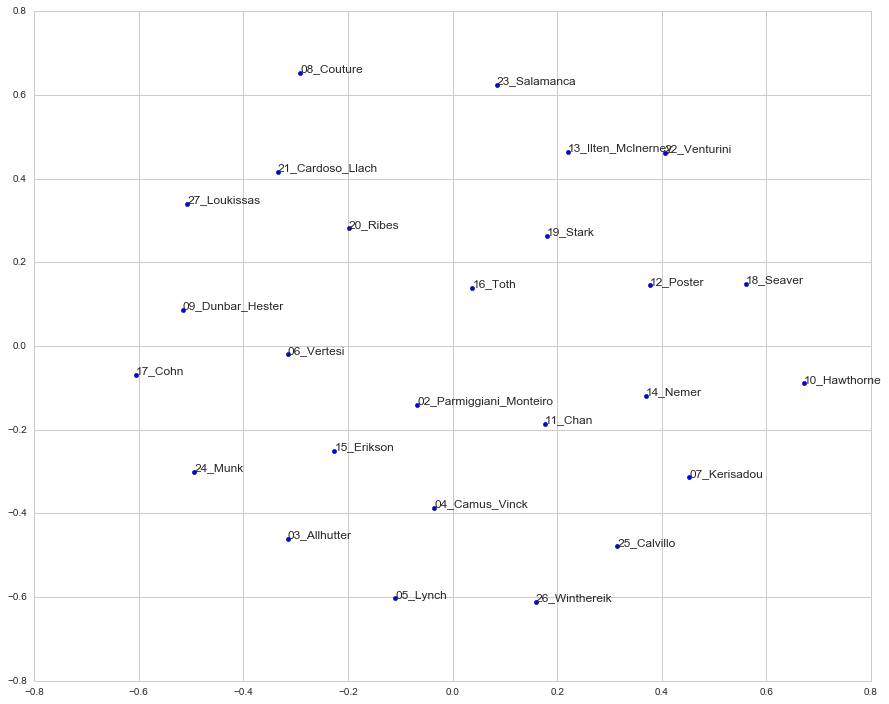

In [70]:
sns.set_style("whitegrid")

names = [os.path.basename(fn).replace('.csv', '') for fn in filenames]

xs, ys = pos[:, 0], pos[:, 1]

plt.figure(figsize=(15,12))
           
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name, fontsize=12)

plt.show()

### 3D Plot

['02', '03', '04', '05', '06']

In [71]:
three_mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = three_mds.fit_transform(dist)

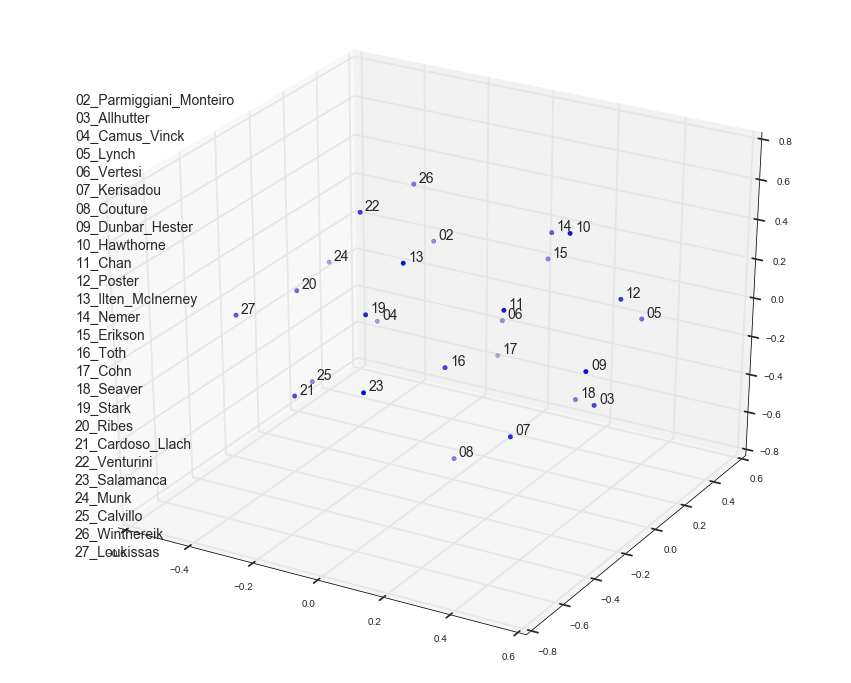

In [190]:
nums = [name.split('_')[0] for name in names] # for labeling of dots, full file name is cluttered

sns.set_style("whitegrid")

fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

offset = .06

l = 0 

for x, y, z, s, n in zip(pos[:, 0], pos[:, 1], pos[:, 2], names, nums):
    ax.annotate(s, xy=(.08, .08), xytext=(-.08,.063-l), fontsize=14)
    ax.text(x + .01, y + .01, z + .01, n, fontsize=14)
#     ax.text(.8 + l, 1 + l, .75 + l, s, fontsize=12)
    l += .005
    
# plt.legend(names, loc=2, bbox_to_anchor=(1.05, 1))
    
plt.show()

### Dendrogram

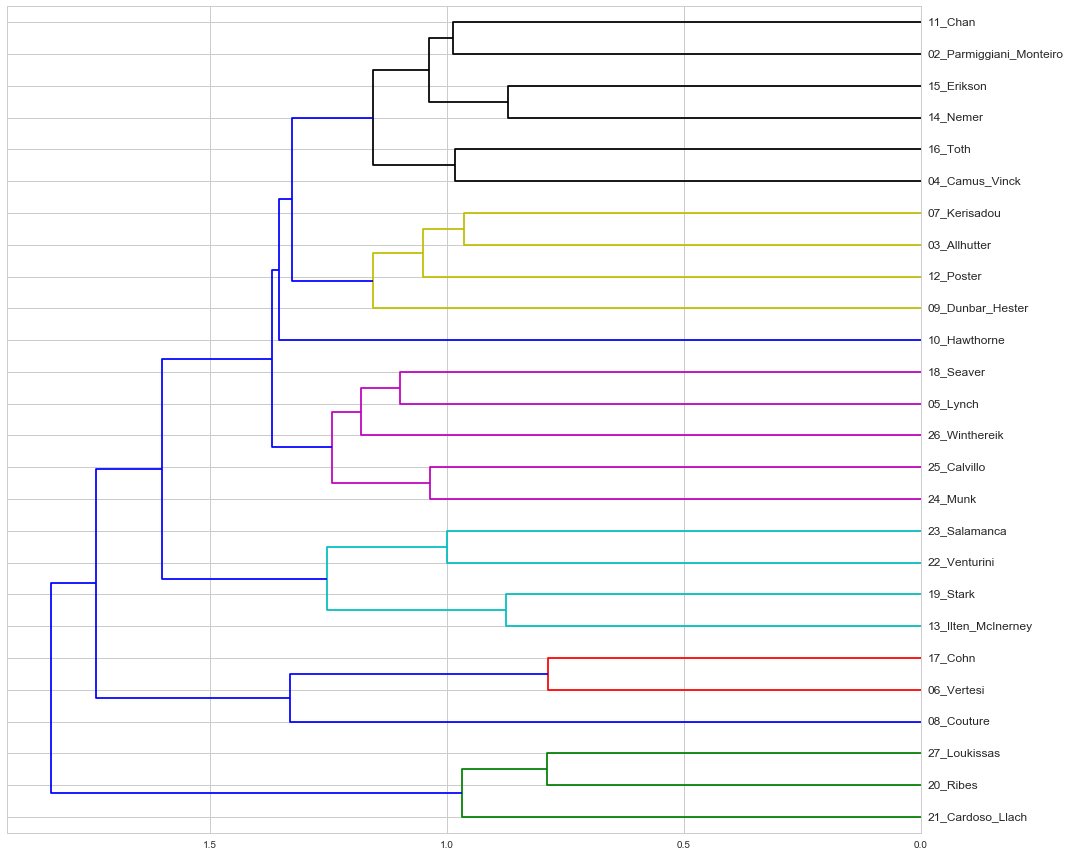

In [191]:
linkage_matrix = ward(dist)
plt.figure(figsize=(15,12))

dendrogram(linkage_matrix, orientation="left", labels=names, leaf_font_size=12)
plt.tight_layout()
plt.show()

### Creating stopword list

In [58]:
stringdir = 'digitalSTS/papers/strings/'

files = [filename.split('.')[0] for filename in os.listdir(stringdir) if not filename.startswith('.')]
# print files

documents = []

for filename in files:

    inpath = stringdir + filename + '.csv'
#     print inpath
    
    with open(inpath, 'r') as infile:
        
        reader = csv.reader(infile)
        document = list(reader)
        documents += document
#         print filename, len(document[0][0]) # 02_Parmiggiani_Monteiro 46997, etc.
        
len(documents) # TOTAL NUMBER OF DOCUMENTS IN LIST

26

In [59]:
# TOKENIZING
tokenizer = RegexpTokenizer(r'\w+')
documents = [tokenizer.tokenize(doc[0].lower()) for doc in documents ]

# [ ['digitized', 'coral', 'reefs', 'elena', 'parmiggiani',...]
#   ['of', 'working', 'ontologists', 'and', 'high',...], ...]

In [63]:


# GATHERING CANDIDATES FOR CUSTOM LIST OF STOPWORDS FROM NGRAMS
# ['i','m','a','a','i','t','6',...]
unichar = [ w for doc in documents for w in doc if len(w)==1]
# ['do','or','or','of','be',...]
bichar  = [ w for doc in documents for w in doc if len(w)==2]
# ['get', 'know', 'would', etc.] # any other commonly reoccuring stopwords not accounted for by len 1 or 2
misc = ['get', 'know', 'would', 'also', 'become']

stoplist  = list(set(nltk.corpus.stopwords.words("english") + unichar + bichar + misc)) # set removes duplicates
print 'LISTS:', len(unichar), len(bichar), len(misc), len(nltk.corpus.stopwords.words("english"))
print 'UNIQUE SET:', len(stoplist)

LISTS: 4506 28037 5 153
UNIQUE SET: 254
